In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

from sklearn.model_selection import GridSearchCV

In [2]:
# conda update -n base -c defaults conda

In [3]:
# conda install -c anaconda py-xgboost

In [4]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [5]:
# conda install -c conda-forge lightgbm

In [6]:
import lightgbm as lgbm

In [7]:
import warnings
warnings.simplefilter('ignore')

# Курсовой проект по Python для DS 2 Гладышев В.В.

## Загрузка и подготовка данных

In [8]:
train = pd.read_csv("course_project_train.csv")
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [10]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [11]:
test = pd.read_csv("course_project_test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [12]:
train['Id'] = np.arange(0, len(train))
test['Id'] = np.arange(7500, 7500 + len(test))

In [13]:
def print_categorical(data):
    for cat_colname in data.columns:
        if len(data[cat_colname].unique()) < 20:
            print(str(cat_colname) + '\n\n' + str(data[cat_colname].unique()) + '\n\n')
            print(data.groupby(cat_colname)[cat_colname].count())
            print('*' * 100 + '\n')

In [14]:
print_categorical(train)

Home Ownership

['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']


Home Ownership
Have Mortgage      12
Home Mortgage    3637
Own Home          647
Rent             3204
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']


Years in current job
1 year        504
10+ years    2332
2 years       705
3 years       620
4 years       469
5 years       516
6 years       426
7 years       396
8 years       339
9 years       259
< 1 year      563
Name: Years in current job, dtype: int64
****************************************************************************************************

Tax Liens

[0. 3. 1. 2. 4. 6. 5. 7.]


Tax Liens
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
**********

In [15]:
map_Jb = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
train["Years in current job"] = train["Years in current job"].map(map_Jb)
test["Years in current job"] = test["Years in current job"].map(map_Jb)

In [16]:
map_HO = {
    'Have Mortgage': 2,
    'Home Mortgage': 2,
    'Own Home': 3,
    'Rent': 1
}
train["Home Ownership"] = train["Home Ownership"].map(map_HO)
test["Home Ownership"] = test["Home Ownership"].map(map_HO)

In [17]:
train["Years in current job"] = train["Years in current job"].fillna(0)
test["Years in current job"] = test["Years in current job"].fillna(0)

In [18]:
train.loc[train["Term"] == "Long Term", "Term"] = 1
train.loc[train["Term"] == "Short Term", "Term"] = 0
test.loc[test["Term"] == "Long Term", "Term"] = 1
test.loc[test["Term"] == "Short Term", "Term"] = 0

In [19]:
train["Term"] = train["Term"].astype(np.int64)
test["Term"] = test["Term"].astype(np.int64)

In [20]:
train.loc[(train['Bankruptcies'].isnull() & train['Months since last delinquent']), 'Bankruptcies'] = 1
train.loc[(train['Bankruptcies'].isnull() & (train['Months since last delinquent'] == 0)), 'Bankruptcies'] = 0
test.loc[(test['Bankruptcies'].isnull() & test['Months since last delinquent']), 'Bankruptcies'] = 1
test.loc[(test['Bankruptcies'].isnull() & (test['Months since last delinquent'] == 0)), 'Bankruptcies'] = 0

In [21]:
tmp = train.loc[train['Months since last delinquent'] > 0].copy()

In [22]:
train.loc[(train['Months since last delinquent'] > 0) & (train['Number of Credit Problems'] > 0), 'Months since last delinquent'].mean()

42.6094674556213

In [23]:
tmp.groupby(['Number of Credit Problems'],as_index=False).agg({'Months since last delinquent':'mean'})

,Number of Credit Problems,Months since last delinquent
0,0.0,33.521424
1,1.0,41.987923
2,2.0,43.963636
3,3.0,47.400000
4,4.0,45.833333
5,5.0,43.571429
6,6.0,55.000000
7,7.0,54.000000


In [24]:
tmp_lst = tmp.groupby(['Number of Credit Problems'],as_index=False).agg({'Months since last delinquent':'mean'})['Months since last delinquent'].tolist()

In [25]:
for i in range(0, 8):
    train.loc[(((train['Months since last delinquent'].isnull()) | 
                (train['Months since last delinquent'] == 0)) & 
               (train['Number of Credit Problems'] == i)), ['Months since last delinquent']] = tmp_lst[i] 
    test.loc[(((test['Months since last delinquent'].isnull()) | 
               (test['Months since last delinquent'] == 0)) & 
              (test['Number of Credit Problems'] == i)), ['Months since last delinquent']] = tmp_lst[i] 

In [26]:
train.loc[train['Credit Default'] == 0, 'Purpose'].value_counts()

debt consolidation      4290
other                    468
home improvements        304
business loan             74
buy a car                 72
medical bills             49
major purchase            31
take a trip               27
buy house                 25
small business            12
wedding                   11
educational expenses       9
moving                     9
vacation                   6
Name: Purpose, dtype: int64

In [27]:
train.loc[train['Credit Default'] == 1, 'Purpose'].value_counts()

debt consolidation      1654
other                    197
home improvements        108
business loan             55
buy a car                 24
medical bills             22
small business            14
take a trip               10
major purchase             9
buy house                  9
wedding                    4
vacation                   2
moving                     2
renewable energy           2
educational expenses       1
Name: Purpose, dtype: int64

In [28]:
map_P = {
    'business loan': 1,
    'buy a car': 2,
    'buy house': 3,
    'debt consolidation': 4,
    'educational expenses': 5,
    'home improvements': 6,
    'major purchase': 7,
    'medical bills': 8,
    'moving': 9,
    'other': 10,
    'renewable energy': 11,
    'small business': 12,
    'take a trip': 13,
    'vacation': 14,
    'wedding': 15
}
train["Purpose"] = train["Purpose"].map(map_P)
test["Purpose"] = test["Purpose"].map(map_P)

In [29]:
print_categorical(train)

Home Ownership

[3 2 1]


Home Ownership
1    3204
2    3649
3     647
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

[ 0.  10.   8.   6.   7.   5.   1.   0.5  4.   3.   2.   9. ]


Years in current job
0.0      371
0.5      563
1.0      504
2.0      705
3.0      620
4.0      469
5.0      516
6.0      426
7.0      396
8.0      339
9.0      259
10.0    2332
Name: Years in current job, dtype: int64
****************************************************************************************************

Tax Liens

[0. 3. 1. 2. 4. 6. 5. 7.]


Tax Liens
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64
****************************************************************************************************

Number of Credit Problems

[1. 0. 3. 2. 6. 4. 5. 7.]


Number of Credit Problems
0.0    6469
1.0     882
2.0 

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   int64  
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7500 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   int64  
 11  Term                          7500 non-null   int64  
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [31]:
#print_categorical(test)

In [32]:
train.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
count,7500.000000,5.943000e+03,7500.00000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000,7500.000000
mean,1.659067,1.366392e+06,5.62700,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.749674,0.117333,4.729333,0.259200,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733,3749.500000
std,0.630305,8.453392e+05,3.69872,0.271604,4.908924,7.041946,1.602622e+07,0.498598,14.707103,0.347346,2.076435,0.438225,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874,2165.207842
min,1.000000,1.645970e+05,0.00000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000
25%,1.000000,8.443410e+05,2.00000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,33.521424,0.000000,4.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000,1874.750000
50%,2.000000,1.168386e+06,6.00000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,33.521424,0.000000,4.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,3749.500000
75%,2.000000,1.640137e+06,10.00000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,38.000000,0.000000,4.000000,1.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000,5624.250000
max,3.000000,1.014934e+07,10.00000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,15.000000,1.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,7499.000000


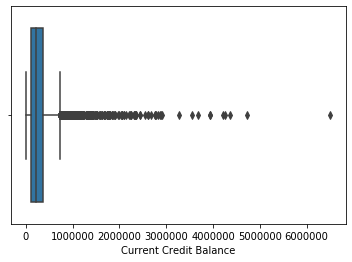

In [33]:
sns.boxplot(train['Current Credit Balance']);

In [34]:
test.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Id
count,2500.000000,1.987000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000,2500.00000
mean,1.691200,1.366922e+06,5.786600,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.521071,0.106800,4.761600,0.255600,1.215572e+07,2.963966e+05,18271.340000,1234.516860,8749.50000
std,0.641878,9.171252e+05,3.672731,0.386291,4.852774,7.254659,1.511983e+06,0.559894,14.908068,0.356994,2.070382,0.436285,3.226097e+07,3.783020e+05,11543.881469,1740.219442,721.83216
min,1.000000,1.065330e+05,0.000000,0.000000,1.000000,3.900000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000,7500.00000
25%,1.000000,8.523115e+05,2.000000,0.000000,8.000000,13.400000,2.785860e+05,0.000000,33.521424,0.000000,4.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000,8124.75000
50%,2.000000,1.178475e+06,6.000000,0.000000,10.000000,17.000000,4.786760e+05,0.000000,33.521424,0.000000,4.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000,8749.50000
75%,2.000000,1.629734e+06,10.000000,0.000000,14.000000,22.100000,8.025985e+05,0.000000,38.000000,0.000000,4.000000,1.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000,9374.25000
max,3.000000,1.497561e+07,10.000000,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,15.000000,1.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000,9999.00000


In [35]:
train.loc[train['Annual Income'] > 1e7]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
6472,1,10149344.0,5.0,0.0,10.0,17.5,270380.0,0.0,22.0,0.0,4,0,664818.0,205713.0,61235.0,692.0,0,6472


In [36]:
train.loc[train['Id'] == 6472, 'Annual Income'] = 1014934
train.loc[train['Id'] == 6472, 'Annual Income']

6472    1014934.0
Name: Annual Income, dtype: float64

In [37]:
train.loc[train['Maximum Open Credit'] > 1e8]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
44,2,1334256.0,10.0,0.0,17.0,15.4,3.800523e+08,1.0,35.000000,0.0,13,0,33110.0,656450.0,34357.0,729.0,0,44
617,2,NaN,3.0,0.0,13.0,27.5,1.304726e+09,0.0,33.521424,0.0,4,0,529892.0,1126814.0,5492.0,NaN,0,617
2617,2,3217802.0,10.0,0.0,12.0,35.5,2.655129e+08,0.0,33.521424,0.0,10,0,50116.0,1834450.0,20272.0,750.0,0,2617


In [38]:
train.loc[train['Id'] == 44, 'Maximum Open Credit'] = 3800528
train.loc[train['Id'] == 44, 'Maximum Open Credit']

44    3800528.0
Name: Maximum Open Credit, dtype: float64

In [39]:
train.loc[train['Id'] == 617, 'Maximum Open Credit'] = 1304726
train.loc[train['Id'] == 617, 'Maximum Open Credit']

617    1304726.0
Name: Maximum Open Credit, dtype: float64

In [40]:
train.loc[train['Id'] == 2617, 'Maximum Open Credit'] = 2651287
train.loc[train['Id'] == 2617, 'Maximum Open Credit']

2617    2651287.0
Name: Maximum Open Credit, dtype: float64

In [41]:
train.loc[train['Monthly Debt'] > 1e5]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
1615,3,6651900.0,10.0,0.0,13.0,25.1,2155868.0,0.0,33.521424,0.0,4,1,314380.0,1623569.0,110311.0,719.0,0,1615
2535,2,4120226.0,10.0,0.0,15.0,13.0,3931620.0,0.0,33.521424,0.0,4,1,542146.0,2889577.0,104036.0,656.0,1,2535
4745,3,6029954.0,4.0,0.0,30.0,17.5,11603856.0,0.0,33.521424,0.0,4,0,753588.0,4720132.0,136679.0,745.0,0,4745
6946,3,6492395.0,1.0,0.0,19.0,26.0,1406526.0,0.0,33.521424,0.0,10,0,322190.0,1169773.0,100091.0,707.0,0,6946


In [42]:
train.groupby(['Credit Default'],as_index=False).agg({'Annual Income':'mean'})

,Credit Default,Annual Income
0,0,1.415951e+06
1,1,1.224243e+06


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   int64  
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7500 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   int64  
 11  Term                          7500 non-null   int64  
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

## Анализ данных и разбиение на контекстные части

### Выделение фрагментов с однозначным соответствием классу

In [44]:
train_a = train.loc[train['Credit Score'] > 850].copy()
test_a = test.loc[test['Credit Score'] > 850].copy()

In [45]:
train_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 69 to 7496
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                400 non-null    int64  
 1   Annual Income                 400 non-null    float64
 2   Years in current job          400 non-null    float64
 3   Tax Liens                     400 non-null    float64
 4   Number of Open Accounts       400 non-null    float64
 5   Years of Credit History       400 non-null    float64
 6   Maximum Open Credit           400 non-null    float64
 7   Number of Credit Problems     400 non-null    float64
 8   Months since last delinquent  400 non-null    float64
 9   Bankruptcies                  400 non-null    float64
 10  Purpose                       400 non-null    int64  
 11  Term                          400 non-null    int64  
 12  Current Loan Amount           400 non-null    float64
 13  Cur

In [46]:
train_a.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
count,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,4.000000e+02,400.000000,400.00000,400.0,400.000000
mean,1.657500,1.247745e+06,5.543750,0.040000,11.432500,17.821500,5.800267e+05,0.137500,34.725401,0.082500,4.602500,0.362500,327142.91500,2.841095e+05,18393.812500,7115.10000,1.0,4061.685000
std,0.671805,7.725890e+05,3.719314,0.280351,5.265906,7.278305,5.264691e+05,0.468126,14.576921,0.301531,2.029727,0.481324,189155.16435,2.348475e+05,11744.836716,306.74537,0.0,2136.619147
min,1.000000,2.060170e+05,0.000000,0.000000,2.000000,5.500000,1.113200e+04,0.000000,3.000000,0.000000,1.000000,0.000000,30514.00000,5.700000e+01,57.000000,6060.00000,1.0,69.000000
25%,1.000000,7.572830e+05,2.000000,0.000000,8.000000,12.875000,2.832445e+05,0.000000,33.521424,0.000000,4.000000,0.000000,183095.00000,1.317365e+05,9981.500000,6987.50000,1.0,2331.500000
50%,2.000000,1.047736e+06,6.000000,0.000000,10.000000,16.300000,4.601520e+05,0.000000,33.521424,0.000000,4.000000,0.000000,269137.00000,2.231740e+05,16165.500000,7190.00000,1.0,4270.500000
75%,2.000000,1.529671e+06,10.000000,0.000000,14.000000,20.825000,7.073275e+05,0.000000,38.000000,0.000000,4.000000,1.000000,443025.00000,3.472725e+05,24225.250000,7340.00000,1.0,5872.500000
max,3.000000,8.200229e+06,10.000000,3.000000,42.000000,45.500000,6.639358e+06,4.000000,81.000000,2.000000,13.000000,1.000000,788634.00000,1.406190e+06,73412.000000,7510.00000,1.0,7496.000000


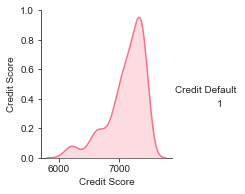

In [47]:
sns.set_style("ticks")
sns.pairplot(train_a[['Credit Score', 
                      'Credit Default']],hue = "Credit Default",diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [48]:
train_b = train.loc[train['Current Loan Amount'] == 99999999].copy()
test_b = test.loc[test['Current Loan Amount'] == 99999999].copy()

In [49]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 0 to 7497
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                870 non-null    int64  
 1   Annual Income                 870 non-null    float64
 2   Years in current job          870 non-null    float64
 3   Tax Liens                     870 non-null    float64
 4   Number of Open Accounts       870 non-null    float64
 5   Years of Credit History       870 non-null    float64
 6   Maximum Open Credit           870 non-null    float64
 7   Number of Credit Problems     870 non-null    float64
 8   Months since last delinquent  870 non-null    float64
 9   Bankruptcies                  870 non-null    float64
 10  Purpose                       870 non-null    int64  
 11  Term                          870 non-null    int64  
 12  Current Loan Amount           870 non-null    float64
 13  Curr

In [50]:
train_b.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
count,870.000000,8.700000e+02,870.000000,870.000000,870.000000,870.000000,8.700000e+02,870.000000,870.000000,870.000000,870.000000,870.000000,870.0,8.700000e+02,870.000000,870.000000,870.0,870.000000
mean,1.683908,1.427779e+06,5.618391,0.024138,11.134483,18.509080,8.373678e+05,0.158621,34.743301,0.112644,4.702299,0.165517,99999999.0,3.028599e+05,17933.028736,730.225287,0.0,3698.718391
std,0.629240,8.998839e+05,3.687803,0.259443,4.803056,7.024222,2.096922e+06,0.465261,13.835894,0.337460,1.999970,0.371860,0.0,3.590877e+05,12264.380264,21.395230,0.0,2147.679755
min,1.000000,2.167140e+05,0.000000,0.000000,2.000000,4.800000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,99999999.0,0.000000e+00,0.000000,601.000000,0.0,0.000000
25%,1.000000,8.668560e+05,2.000000,0.000000,8.000000,13.725000,3.001625e+05,0.000000,33.521424,0.000000,4.000000,0.000000,99999999.0,1.145225e+05,9484.750000,726.000000,0.0,1917.500000
50%,2.000000,1.245507e+06,6.000000,0.000000,10.000000,17.200000,5.155040e+05,0.000000,33.521424,0.000000,4.000000,0.000000,99999999.0,2.134650e+05,15445.500000,737.000000,0.0,3689.000000
75%,2.000000,1.726886e+06,10.000000,0.000000,14.000000,22.350000,8.601725e+05,0.000000,35.750000,0.000000,4.000000,0.000000,99999999.0,3.633702e+05,23421.250000,744.000000,0.0,5547.250000
max,3.000000,8.758449e+06,10.000000,6.000000,34.000000,50.900000,4.092389e+07,6.000000,81.000000,3.000000,15.000000,1.000000,99999999.0,4.249673e+06,94674.000000,751.000000,0.0,7497.000000


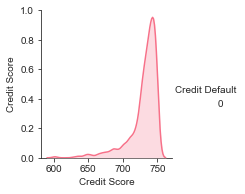

In [51]:
sns.set_style("ticks")
sns.pairplot(train_b[['Credit Score', 
                      'Credit Default']],hue = "Credit Default",diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

### Разделение датасета по признаку наличия данных: Credit Score и Annual Income

In [52]:
train_c = train.loc[train['Credit Score'].isnull()].copy()
test_c = test.loc[test['Credit Score'].isnull()].copy()
train_c.drop(['Annual Income', 'Credit Score'], axis=1, inplace=True)
test_c.drop(['Annual Income', 'Credit Score'], axis=1, inplace=True)

In [53]:
train_f = train.loc[(train['Credit Score'].notnull()) & (train['Current Loan Amount'] != 99999999) & (train['Credit Score'] < 850)].copy()
test_f = test.loc[(test['Credit Score'].notnull()) & (test['Current Loan Amount'] != 99999999) & (test['Credit Score'] < 850)].copy()

In [54]:
train_f = train_f.reset_index(drop=True)
test_f = test_f.reset_index(drop=True)
train_c = train_c.reset_index(drop=True)
test_c = test_c.reset_index(drop=True)

### Анализ train_f (части с Credit Score и Annual Income)

In [55]:
train_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4673 entries, 0 to 4672
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                4673 non-null   int64  
 1   Annual Income                 4673 non-null   float64
 2   Years in current job          4673 non-null   float64
 3   Tax Liens                     4673 non-null   float64
 4   Number of Open Accounts       4673 non-null   float64
 5   Years of Credit History       4673 non-null   float64
 6   Maximum Open Credit           4673 non-null   float64
 7   Number of Credit Problems     4673 non-null   float64
 8   Months since last delinquent  4673 non-null   float64
 9   Bankruptcies                  4673 non-null   float64
 10  Purpose                       4673 non-null   int64  
 11  Term                          4673 non-null   int64  
 12  Current Loan Amount           4673 non-null   float64
 13  Cur

In [56]:
train_f.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
count,4673.000000,4.673000e+03,4673.000000,4673.000000,4673.000000,4673.000000,4.673000e+03,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000,4.673000e+03,4673.000000,4673.000000,4673.000000,4673.000000
mean,1.657608,1.363164e+06,5.640274,0.029317,11.097582,18.317826,6.784727e+05,0.174406,34.757847,0.122405,4.716884,0.276482,310232.343248,2.891550e+05,18333.141665,718.933661,0.253370,3751.989728
std,0.626227,8.299689e+05,3.703429,0.270156,4.888515,7.026084,1.248615e+06,0.506562,14.959152,0.358956,2.066139,0.447306,182620.483351,3.201366e+05,11827.757354,28.316125,0.434988,2165.037312
min,1.000000,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,1.000000
25%,1.000000,8.470580e+05,2.000000,0.000000,8.000000,13.600000,2.742300e+05,0.000000,33.521424,0.000000,4.000000,0.000000,172964.000000,1.130500e+05,10217.000000,706.000000,0.000000,1867.000000
50%,2.000000,1.168158e+06,6.000000,0.000000,10.000000,17.000000,4.720540e+05,0.000000,33.521424,0.000000,4.000000,0.000000,266552.000000,2.082780e+05,16244.000000,727.000000,0.000000,3721.000000
75%,2.000000,1.631967e+06,10.000000,0.000000,14.000000,21.800000,7.904600e+05,0.000000,39.000000,0.000000,4.000000,1.000000,432080.000000,3.625580e+05,23865.000000,740.000000,1.000000,5612.000000
max,3.000000,9.338880e+06,10.000000,7.000000,43.000000,57.700000,5.756256e+07,7.000000,118.000000,4.000000,15.000000,1.000000,789030.000000,6.506797e+06,136679.000000,751.000000,1.000000,7495.000000


In [57]:
table = train_f.pivot_table(values=['Annual Income', 'Monthly Debt', 'Credit Score'], 
                            index=['Purpose', 'Term', 'Credit Default'], 
                            aggfunc=np.mean)

In [58]:
table_add = train_f.pivot_table(values=['Id'], 
                            index=['Purpose', 'Term', 'Credit Default'], 
                            aggfunc='count')

In [59]:
table = pd.concat([table, table_add], axis=1)
table

Annual Income  Credit Score  Monthly Debt    Id
Purpose Term Credit Default                                                 
1       0    0                1.586319e+06    716.850000  14294.250000    40
             1                1.755449e+06    712.111111  22589.555556    18
        1    0                1.486041e+06    686.555556  13297.888889     9
             1                1.729734e+06    685.000000  14738.250000    16
2       0    0                1.551600e+06    735.828571  17766.628571    35
             1                8.519220e+05    719.090909   8801.363636    11
        1    0                1.213110e+06    727.800000  11277.700000    10
             1                9.651715e+05    676.250000  13199.000000     4
3       0    0                1.670009e+06    700.000000  17502.888889     9
             1                8.294260e+05    737.500000  10591.500000     2
        1    0                3.098097e+06    699.750000  18821.500000     4
             1                1.398026e+06    665.333333  15836.666667     3
4       0    0                1.347402e+06    729.739417  17714.789746  2126
             1                1.120860e+06    723.563869  17376.439781   548
        1    0                1.544492e+06    701.415797  22049.822653   671
             1                1.330844e+06    693.861702  21665.808511   376
5       0    0                1.583560e+06    737.000000  15502.750000     4
             1                2.013810e+05    742.000000   3591.000000     1
        1    0                3.694360e+05    744.000000   1524.000000     1
6       0    0                1.531992e+06    731.323308  16434.684211   133
             1                1.098772e+06    726.290323  16707.870968    31
        1    0                2.017023e+06    703.274510  21003.274510    51
             1                1.310596e+06    690.192308  21318.884615    26
7       0    0                1.239119e+06    735.428571  13865.071429    14
             1                2.004870e+06    736.500000  32194.500000     2
        1    0                1.653403e+06    694.600000  19529.400000     5
             1                1.902508e+06    670.000000  20864.500000     4
8       0    0                1.830739e+06    718.809524  19319.666667    21
             1                1.163134e+06    713.333333  17515.750000    12
        1    0                1.733455e+06    690.363636  22089.727273    11
             1                1.524104e+06    717.500000  17005.500000     2
9       0    0                8.243796e+05    718.400000   8170.400000     5
        1    0                2.293908e+06    729.000000  10246.000000     1
10      0    0                1.290029e+06    722.040323  14901.834677   248
             1                1.063752e+06    715.637500  14577.637500    80
        1    0                1.610760e+06    686.000000  18253.473684    57
             1                1.305207e+06    681.875000  19167.687500    32
12      0    0                8.997482e+05    715.000000  11091.333333     6
             1                8.261580e+05    679.750000   9762.000000     4
        1    0                1.893046e+06    698.000000   5900.000000     1
             1                1.356277e+06    676.666667  10715.333333     3
13      0    0                1.253086e+06    706.529412  15056.235294    17
             1                7.698952e+05    701.800000   7634.600000     5
        1    1                2.309868e+06    647.000000  21944.000000     1
14      0    0                6.015875e+05    697.500000   9249.000000     2
             1                2.400631e+06    732.000000  38610.000000     1
        1    0                2.272761e+06    606.000000  27652.000000     1
15      0    0                1.178771e+06    711.200000  12305.000000     5
             1                7.308350e+05    737.000000  14465.000000     1
        1    0                2.885616e+06    696.000000  17393.500000     2
             1           

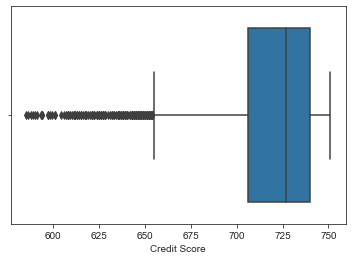

In [60]:
sns.boxplot(train_f['Credit Score'])

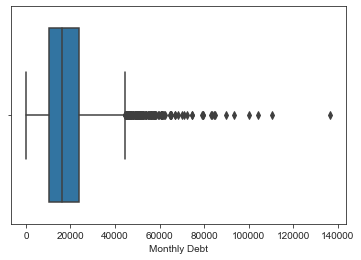

In [61]:
sns.boxplot(train_f['Monthly Debt'])

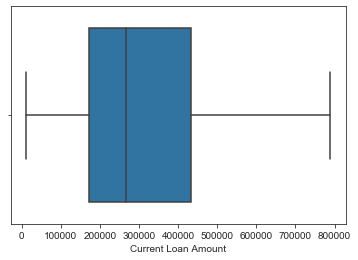

In [62]:
sns.boxplot(train_f['Current Loan Amount'])

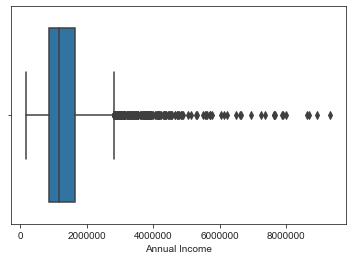

In [63]:
sns.boxplot(train_f['Annual Income'])

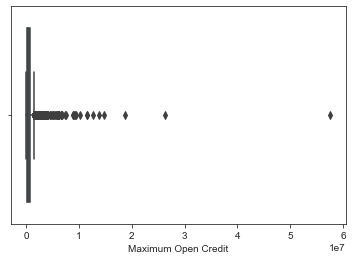

In [64]:
sns.boxplot(train_f['Maximum Open Credit'])

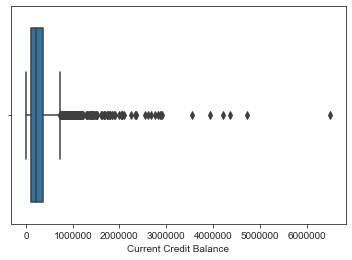

In [65]:
sns.boxplot(train_f['Current Credit Balance'])

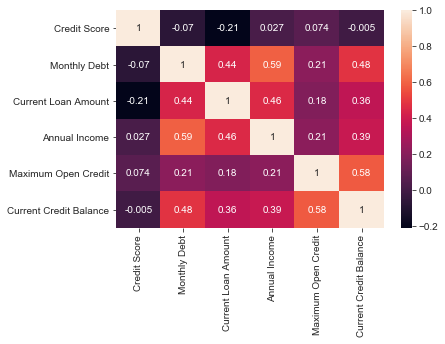

In [66]:
sns.heatmap(train_f[['Credit Score', 
                     'Monthly Debt', 
                     'Current Loan Amount', 
                     'Annual Income',
                     'Maximum Open Credit', 
                     'Current Credit Balance']].corr(),
            annot=True)

In [67]:
train_f[['Credit Score', 
         'Monthly Debt', 
         'Current Loan Amount', 
         'Annual Income',
         'Maximum Open Credit', 
         'Current Credit Balance']].corr()

,Credit Score,Monthly Debt,Current Loan Amount,Annual Income,Maximum Open Credit,Current Credit Balance
Credit Score,1.000000,-0.070463,-0.208572,0.026737,0.074173,-0.005023
Monthly Debt,-0.070463,1.000000,0.435763,0.594612,0.212627,0.481913
Current Loan Amount,-0.208572,0.435763,1.000000,0.456401,0.183606,0.361072
Annual Income,0.026737,0.594612,0.456401,1.000000,0.212383,0.385943
Maximum Open Credit,0.074173,0.212627,0.183606,0.212383,1.000000,0.583378
Current Credit Balance,-0.005023,0.481913,0.361072,0.385943,0.583378,1.000000


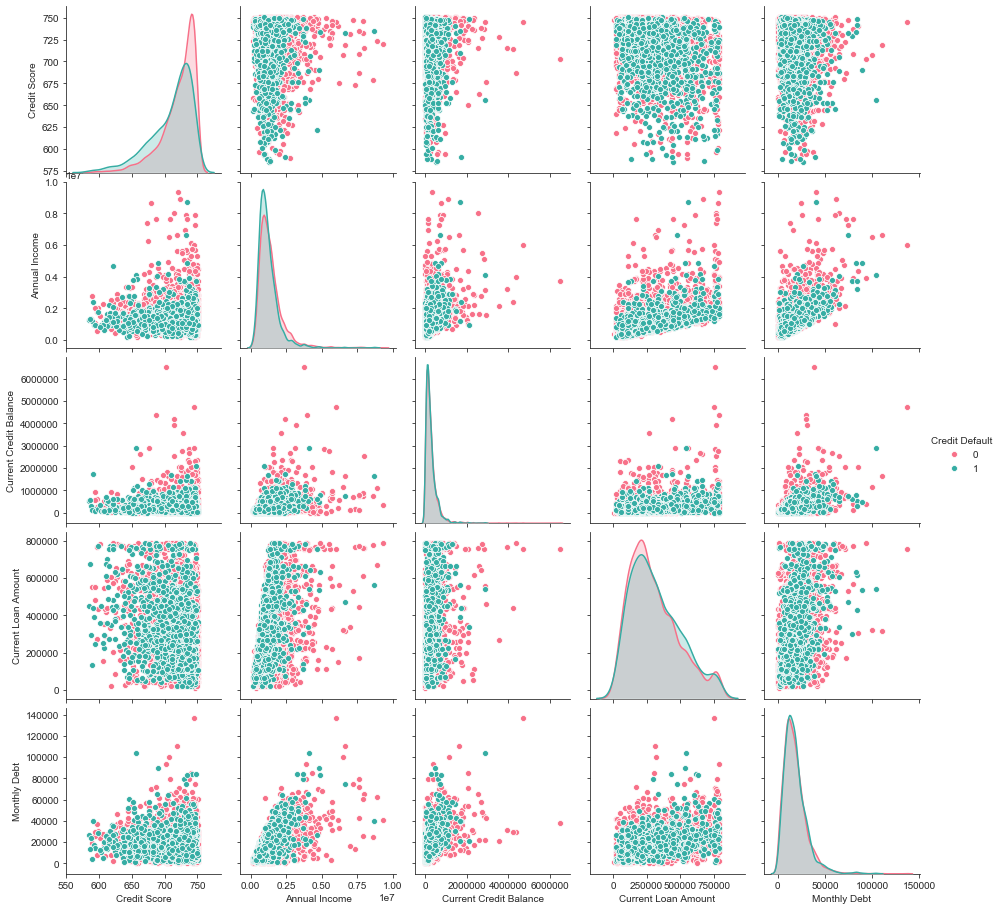

In [68]:
sns.set_style("ticks")
sns.pairplot(train_f[['Credit Score', 
                      'Annual Income',
                      'Current Credit Balance',
                      'Current Loan Amount',
                      'Monthly Debt',
                      'Credit Default']],hue = "Credit Default",diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [69]:
table = train_f.pivot_table(values=['Id'], 
                            index=['Term'],
                            columns=['Credit Default'],
                            aggfunc='count')
table

Id     
Credit Default     0    1
Term                     
0               2665  716
1                824  468

In [70]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

3.832895007526199e-26

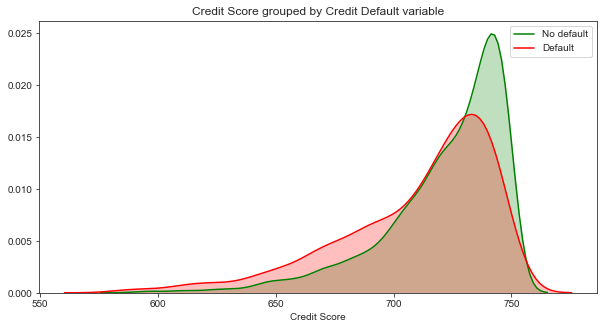

In [71]:
credit_score_with_target_s = train_f[['Credit Score', 'Credit Default']]
credit_score_s = credit_score_with_target_s['Credit Score']
credit_score_target_0 = credit_score_s[credit_score_with_target_s['Credit Default'] == 0]
credit_score_target_1 = credit_score_s[credit_score_with_target_s['Credit Default'] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(credit_score_target_0, shade=True, label='No default', color='g')
sns.kdeplot(credit_score_target_1, shade=True, label='Default', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by Credit Default variable')
plt.show()

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

In [72]:
W, p_value = shapiro(credit_score_s)
W, p_value

(0.8620007038116455, 0.0)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

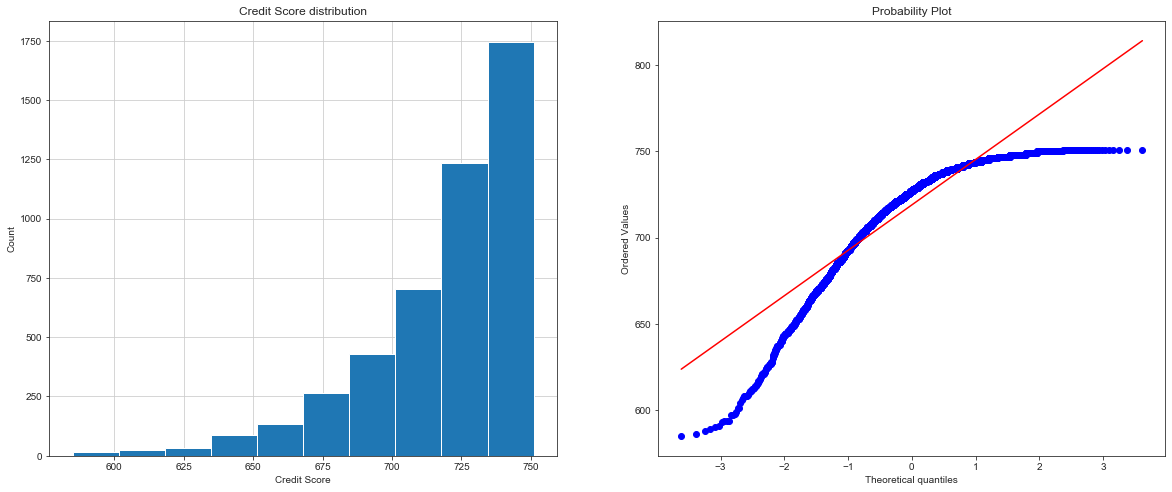

In [73]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Count')
ax1.set_title('Credit Score distribution')
credit_score_s.hist()

plt.subplot(122)
probplot(credit_score_s, dist='norm', plot=plt)

plt.show()

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака LIMIT_BAL в группах с просроченным и непросроченным платежом в следующем месяце, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

In [74]:
mannwhitneyu(credit_score_target_0, credit_score_target_1)

MannwhitneyuResult(statistic=1583123.0, pvalue=1.2805630527150116e-33)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается.

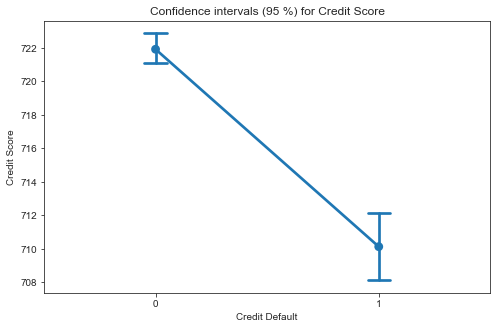

In [75]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Credit Default', y='Credit Score', data=credit_score_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')
plt.show()

### Анализ train_c (части без Credit Score и Annual Income)

In [76]:
table = train_c.pivot_table(values=['Monthly Debt'], 
                            index=['Purpose', 'Term', 'Credit Default'], 
                            aggfunc=np.mean)

In [77]:
table_add = train_c.pivot_table(values=['Id'], 
                            index=['Purpose', 'Term', 'Credit Default'], 
                            aggfunc='count')

In [78]:
table = pd.concat([table, table_add], axis=1)
table

Monthly Debt   Id
Purpose Term Credit Default                   
1       0    0               26954.111111    9
             1               25037.000000    6
        1    0               15448.600000    5
             1               18858.333333    3
2       0    0               14343.909091   11
             1                3203.666667    3
        1    0               10893.600000    5
3       0    0                7890.000000    4
             1               11966.000000    2
        1    0               28653.000000    1
             1               15307.000000    1
4       0    0               17666.763930  682
             1               17658.044000  250
        1    0               22284.016000  125
             1               22285.579618  157
5       0    0               26937.000000    1
6       0    0               21361.836735   49
             1               22559.000000   15
        1    0               17530.111111    9
             1               18347.130435   23
7       0    0               19635.250000    8
             1               50484.000000    1
        1    0                8426.000000    1
8       0    0               14297.857143    7
             1               15724.500000    4
        1    0               12703.000000    2
9       0    1                7348.000000    1
10      0    0               15957.651163   86
             1               14065.135135   37
        1    0               18498.272727   11
             1               18114.500000   14
11      0    1                9878.000000    1
        1    1                6421.000000    1
12      0    0                5075.000000    1
             1               27299.000000    1
        1    0               18351.000000    1
             1               26359.333333    3
13      0    0               16445.857143    7
             1                9561.000000    2
        1    1               32065.000000    1
14      0    0                4955.500000    2
             1               11120.000000    1
15      0    0                6420.000000    1
             1               19801.500000    2

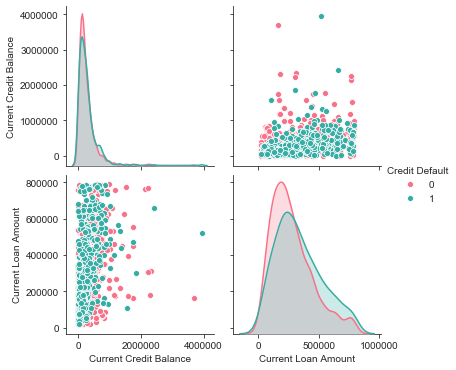

In [79]:
sns.set_style("ticks")
sns.pairplot(train_c[['Current Credit Balance',
                      'Current Loan Amount',
                      'Credit Default']],hue = "Credit Default",diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

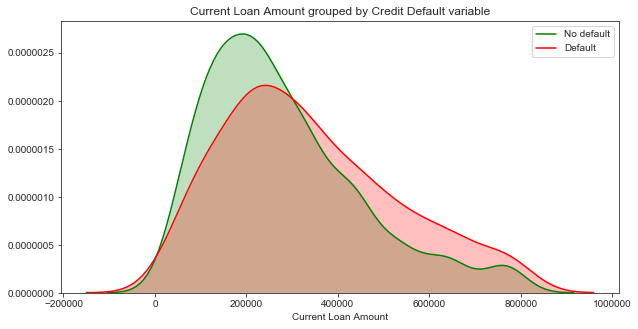

In [80]:
current_loan_amount_with_target_s = train_c[['Current Loan Amount', 'Credit Default']]
current_loan_amount_s = current_loan_amount_with_target_s['Current Loan Amount']
current_loan_amount_target_0 = current_loan_amount_s[current_loan_amount_with_target_s['Credit Default'] == 0]
current_loan_amount_target_1 = current_loan_amount_s[current_loan_amount_with_target_s['Credit Default'] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(current_loan_amount_target_0, shade=True, label='No default', color='g')
sns.kdeplot(current_loan_amount_target_1, shade=True, label='Default', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by Credit Default variable')
plt.show()

In [81]:
W, p_value = shapiro(current_loan_amount_s)
W, p_value

(0.9359058737754822, 2.3285623317407443e-25)

In [82]:
statistic, pvalue = mannwhitneyu(current_loan_amount_target_0, current_loan_amount_target_1)
statistic, pvalue

(221512.0, 1.0030163992961036e-09)

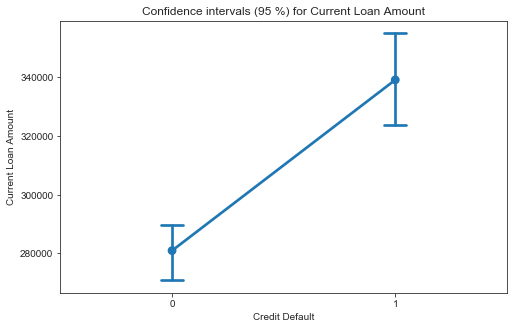

In [83]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Credit Default', y='Current Loan Amount', data=current_loan_amount_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Current Loan Amount')
plt.show()

In [84]:
X_f = train_f.drop(['Id', 'Credit Default'], axis=1)

In [85]:
y_f = train_f['Credit Default']

In [86]:
T_f = test_f.drop(['Id'], axis=1)

In [87]:
X_c = train_c.drop(['Id', 'Credit Default'], axis=1)

In [88]:
y_c = train_c['Credit Default']

In [89]:
T_c = test_c.drop(['Id'], axis=1)

## Модели

### Модель для части train_c (XGBRegressor)

In [90]:
def get_reg_model(parameters, X, y):
    clf = GridSearchCV(
        estimator=XGBRegressor(objective='reg:squarederror', 
                               silent=False, 
                               nthread=2, 
                               subsample=0.5, 
                               learning_rate=0.03, 
                               random_state=42),
        param_grid=parameters,
        scoring='neg_mean_squared_error',
        cv=5,
        return_train_score = True
    )
    
    clf.fit(X, y)
    
    cv_results = pd.DataFrame(clf.cv_results_)

    #print(cv_results.columns)
    
    param_columns = [
        column
        for column in cv_results.columns
        if column.startswith('param_')
    ]

    score_columns = ['mean_test_score', 'mean_train_score']

    cv_results = (cv_results[param_columns + score_columns]
                  .sort_values(by=score_columns, ascending=False))

    print(cv_results)
    print(f"\nbest params: {clf.best_params_}\n")
    
    model = XGBRegressor(silent=False, 
                            objective='reg:squarederror',  
                            nthread=2, 
                            max_depth=clf.best_params_['max_depth'], 
                            n_estimators=clf.best_params_['n_estimators'], 
                            seed=clf.best_params_['seed'],
                            subsample=0.5, 
                            learning_rate=0.03, 
                            random_state=42)
    return model

In [91]:
def print_reg_scores(model, X, y, threshold):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    print(f"mean absolute error: {mean_absolute_error(y_valid, y_pred):.3f}")
    print(f"mean squared error: {mean_squared_error(y_valid, y_pred):.3f}")
    print(f"r2 score:\t{r2_score(y_valid, y_pred):.3f}")

In [92]:
def print_adapt_scores(model, X, y, threshold):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    y_pred[y_pred >= threshold] = 1
    y_pred[y_pred < threshold] = 0
    
    print(f"confusion_matrix: \n{confusion_matrix(y_valid, y_pred)}\n")
    print(f"precision:\t{precision_score(y_valid, y_pred):.3f}")
    print(f"recall:\t\t{recall_score(y_valid, y_pred):.3f}")
    print(f"roc auc:\t{roc_auc_score(y_valid, y_pred):.3f}")
    print(f"f1:\t\t{f1_score(y_valid, y_pred):.3f}")
    print(f"accuracy:\t{accuracy_score(y_valid, y_pred):.3f}\n")
    print(f"feature importances: \n{model.feature_importances_}\n")
    print(f"classification_report: \n{classification_report(y_valid, y_pred)}")

In [93]:
def print_adapt_scores_str(model, X, y, threshold):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    y_pred[y_pred >= threshold] = 1
    y_pred[y_pred < threshold] = 0
    
    print(f"f1: {f1_score(y_valid, y_pred):.3f} precision: {precision_score(y_valid, y_pred):.3f} recall: {recall_score(y_valid, y_pred):.3f}")

In [94]:
def print_adapt_scores_str_opt(model, X, y, threshold):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    y_pred[y_pred >= threshold] = 1
    y_pred[y_pred < threshold] = 0
    
    f1 = f1_score(y_valid, y_pred)
    print(f"\tf1: {f1:.3f} precision: {precision_score(y_valid, y_pred):.3f} recall: {recall_score(y_valid, y_pred):.3f}")
    
    return f1

In [95]:
# parameters_reg = {
#     'n_estimators': [600, 800, 1000],
#     'seed': [800, 1000],
#     'max_depth': [5, 7, 9]
# }
parameters_reg = {
    'n_estimators': [600],
    'seed': [1000],
    'max_depth': [9]
}

In [96]:
xgb_reg_model_c = get_reg_model(parameters_reg, X_c, y_c)

  param_max_depth param_n_estimators param_seed  mean_test_score  \
0               9                600       1000        -0.229143   

   mean_train_score  
0         -0.000464  

best params: {'max_depth': 9, 'n_estimators': 600, 'seed': 1000}



In [97]:
print_adapt_scores(xgb_reg_model_c, X_c, y_c, 0.5)

confusion_matrix: 
[[168  49]
 [ 55  40]]

precision:	0.449
recall:		0.421
roc auc:	0.598
f1:		0.435
accuracy:	0.667

feature importances: 
[0.02516662 0.03961405 0.07155976 0.04687535 0.05772435 0.06936666
 0.07375009 0.07437909 0.07805834 0.06860701 0.17003024 0.07336069
 0.0769146  0.07459322]

classification_report: 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       217
           1       0.45      0.42      0.43        95

    accuracy                           0.67       312
   macro avg       0.60      0.60      0.60       312
weighted avg       0.66      0.67      0.66       312



In [98]:
for tr in np.arange(0.15, 0.7, 0.05):
    print(f"treshhold: {tr:.2f}:")
    print_adapt_scores_str(xgb_reg_model_c, X_c, y_c, tr)

treshhold: 0.15:
f1: 0.513 precision: 0.352 recall: 0.947
treshhold: 0.20:
f1: 0.506 precision: 0.358 recall: 0.863
treshhold: 0.25:
f1: 0.508 precision: 0.368 recall: 0.821
treshhold: 0.30:
f1: 0.522 precision: 0.398 recall: 0.758
treshhold: 0.35:
f1: 0.511 precision: 0.401 recall: 0.705
treshhold: 0.40:
f1: 0.485 precision: 0.403 recall: 0.611
treshhold: 0.45:
f1: 0.431 precision: 0.404 recall: 0.463
treshhold: 0.50:
f1: 0.435 precision: 0.449 recall: 0.421
treshhold: 0.55:
f1: 0.358 precision: 0.433 recall: 0.305
treshhold: 0.60:
f1: 0.294 precision: 0.438 recall: 0.221
treshhold: 0.65:
f1: 0.283 precision: 0.562 recall: 0.189


In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
    
xgb_reg_model_c.fit(X_train, y_train)
y_pred = xgb_reg_model_c.predict(X_valid)

fpr, tpr, thresholds = roc_curve(y_valid, y_pred, pos_label=1)

In [100]:
max_r = 0
max_i = 0
for i in range(len(tpr)):
    r_cur = np.sin(np.arctan(tpr[i]/fpr[i])-np.pi/4)*np.sqrt(tpr[i]**2+fpr[i]**2)
#     print(f"tpr: {tpr[i]} fpr: {fpr[i]} r: {r_cur:.4f} threshold: {thresholds[i]} i: {i}")
    if r_cur > max_r:
        max_r = r_cur
        max_i = i
print(f"tpr: {tpr[max_i]} fpr: {fpr[max_i]} r: {max_r:.4f} threshold max: {thresholds[max_i]} max_i: {max_i}")
max_tr_b_r_c = thresholds[max_i]

tpr: 0.7578947368421053 fpr: 0.4792626728110599 r: 0.1970 threshold max: 0.3173724114894867 max_i: 86


In [101]:
max_v = 0
max_i = 0
for i in range(len(tpr)):
    #print(f"tpr: {tpr[i]} fpr: {fpr[i]} tpr-fpr: {tpr[i]-fpr[i]} threshold: {thresholds[i]} i: {i}")
    if tpr[i]-fpr[i] > max_v:
        max_v = tpr[i]-fpr[i]
        max_i = i
print(f"tpr: {tpr[max_i]} fpr: {fpr[max_i]} tpr-fpr: {tpr[max_i]-fpr[max_i]} threshold max: {thresholds[max_i]} max_i: {max_i}")
max_tr_b_c_42 = thresholds[max_i]

tpr: 0.7578947368421053 fpr: 0.4792626728110599 tpr-fpr: 0.2786320640310454 threshold max: 0.3173724114894867 max_i: 86


In [102]:
max_tr_b_c_list =[]
for rs in range(0, 100):
    X_train, X_valid, y_train, y_valid = train_test_split(X_c, y_c, test_size=0.2, random_state=rs)
    
    xgb_reg_model_c.fit(X_train, y_train)
    y_pred = xgb_reg_model_c.predict(X_valid)

    fpr, tpr, thresholds = roc_curve(y_valid, y_pred, pos_label=1)
    
    max_v = 0
    max_i = 0
    for i in range(len(tpr)):
        #print(f"tpr: {tpr[i]} fpr: {fpr[i]} tpr-fpr: {tpr[i]-fpr[i]} threshold: {thresholds[i]} i: {i}")
        if tpr[i]-fpr[i] > max_v:
            max_v = tpr[i]-fpr[i]
            max_i = i
#     print(f"rs: {rs:2d} tpr: {tpr[max_i]:.5f} fpr: {fpr[max_i]:.5f} tpr-fpr: {(tpr[max_i]-fpr[max_i]):.5f} threshold max: {thresholds[max_i]:.5f} max_i: {max_i}")
    max_tr_b_c_list.append(thresholds[max_i])
max_tr_b_c = np.mean(max_tr_b_c_list)
print(f"max_tr_b_c: {max_tr_b_c}")

max_tr_b_c: 0.380402535200119


In [103]:
print_adapt_scores(xgb_reg_model_c, X_c, y_c, max_tr_b_c)

confusion_matrix: 
[[126  91]
 [ 32  63]]

precision:	0.409
recall:		0.663
roc auc:	0.622
f1:		0.506
accuracy:	0.606

feature importances: 
[0.02516662 0.03961405 0.07155976 0.04687535 0.05772435 0.06936666
 0.07375009 0.07437909 0.07805834 0.06860701 0.17003024 0.07336069
 0.0769146  0.07459322]

classification_report: 
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       217
           1       0.41      0.66      0.51        95

    accuracy                           0.61       312
   macro avg       0.60      0.62      0.59       312
weighted avg       0.68      0.61      0.62       312



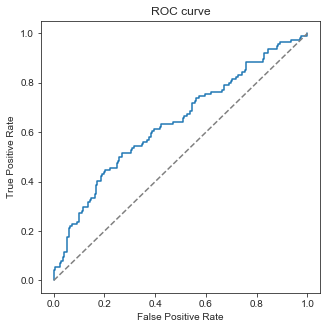

In [104]:
plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

### Модель для части train_f (LGBMRegressor)

In [105]:
def get_model_lgbm_reg(parameters, X, y):
    clf = GridSearchCV(
        estimator=lgbm.LGBMRegressor(subsample=0.5, learning_rate=0.03, random_state=42),
        param_grid=parameters,
        scoring='neg_mean_squared_error',
        cv=5,
        return_train_score = True
    )
    
    clf.fit(X, y)
    
    cv_results = pd.DataFrame(clf.cv_results_)

    #print(cv_results.columns)
    
    param_columns = [
        column
        for column in cv_results.columns
        if column.startswith('param_')
    ]

    score_columns = ['mean_test_score', 'mean_train_score']

    cv_results = (cv_results[param_columns + score_columns]
                  .sort_values(by=score_columns, ascending=False))

    print(cv_results)
    print(f"\nbest params: {clf.best_params_}\n")
    
    model = lgbm.LGBMRegressor(max_depth=clf.best_params_['max_depth'], 
                               n_estimators=clf.best_params_['n_estimators'], 
                               num_leaves=clf.best_params_['num_leaves'],
                               subsample=0.5, 
                               learning_rate=0.03, 
                               random_state=42)
    return model

In [106]:
parameters_lgbm_reg = {
#     'n_estimators': [600, 800, 1000],
#     'num_leaves': [20, 25, 31],
#     'max_depth': [5, 7, 9]
    'n_estimators': [600],
    'num_leaves': [25],
    'max_depth': [5]
}

In [107]:
lgbm_reg_model_f = get_model_lgbm_reg(parameters_lgbm_reg, X_f, y_f)

  param_max_depth param_n_estimators param_num_leaves  mean_test_score  \
0               5                600               25        -0.187047   

   mean_train_score  
0         -0.098083  

best params: {'max_depth': 5, 'n_estimators': 600, 'num_leaves': 25}



best params: {'max_depth': 5, 'n_estimators': 600, 'num_leaves': 25}

In [108]:
print_adapt_scores(lgbm_reg_model_f, X_f, y_f, 0.5)

confusion_matrix: 
[[648  43]
 [212  32]]

precision:	0.427
recall:		0.131
roc auc:	0.534
f1:		0.201
accuracy:	0.727

feature importances: 
[ 126 1118  487   19  556 1183  946   80  666   32  212   88 1051  915
  949  979]

classification_report: 
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       691
           1       0.43      0.13      0.20       244

    accuracy                           0.73       935
   macro avg       0.59      0.53      0.52       935
weighted avg       0.67      0.73      0.67       935



In [109]:
for tr in np.arange(0.05, 0.7, 0.05):
    print(f"treshhold: {tr:.2f}:")
    print_adapt_scores_str(lgbm_reg_model_f, X_f, y_f, tr)

treshhold: 0.05:
f1: 0.421 precision: 0.270 recall: 0.959
treshhold: 0.10:
f1: 0.425 precision: 0.278 recall: 0.902
treshhold: 0.15:
f1: 0.427 precision: 0.291 recall: 0.799
treshhold: 0.20:
f1: 0.430 precision: 0.312 recall: 0.693
treshhold: 0.25:
f1: 0.402 precision: 0.315 recall: 0.553
treshhold: 0.30:
f1: 0.395 precision: 0.342 recall: 0.467
treshhold: 0.35:
f1: 0.369 precision: 0.374 recall: 0.365
treshhold: 0.40:
f1: 0.333 precision: 0.415 recall: 0.279
treshhold: 0.45:
f1: 0.257 precision: 0.425 recall: 0.184
treshhold: 0.50:
f1: 0.201 precision: 0.427 recall: 0.131
treshhold: 0.55:
f1: 0.144 precision: 0.438 recall: 0.086
treshhold: 0.60:
f1: 0.087 precision: 0.387 recall: 0.049
treshhold: 0.65:
f1: 0.053 precision: 0.368 recall: 0.029


In [110]:
X_train, X_valid, y_train, y_valid = train_test_split(X_f, y_f, test_size=0.2, random_state=42)
    
lgbm_reg_model_f.fit(X_train, y_train)
y_pred = lgbm_reg_model_f.predict(X_valid)

fpr, tpr, thresholds = roc_curve(y_valid, y_pred, pos_label=1)

In [111]:
max_v = 0
max_i = 0
for i in range(len(tpr)):
    #print(f"tpr: {tpr[i]} fpr: {fpr[i]} tpr-fpr: {tpr[i]-fpr[i]} threshold: {thresholds[i]} i: {i}")
    if tpr[i]-fpr[i] > max_v:
        max_v = tpr[i]-fpr[i]
        max_i = i
print(f"tpr: {tpr[max_i]} fpr: {fpr[max_i]} tpr-fpr: {tpr[max_i]-fpr[max_i]} threshold max: {thresholds[max_i]} max_i: {max_i}")
max_tr_f_42 = thresholds[max_i]

tpr: 0.42213114754098363 fpr: 0.2532561505065123 tpr-fpr: 0.16887499703447134 threshold max: 0.32453133438806636 max_i: 142


In [112]:
max_tr_f_list =[]
for rs in range(0, 100):
    X_train, X_valid, y_train, y_valid = train_test_split(X_f, y_f, test_size=0.2, random_state=rs)
    
    lgbm_reg_model_f.fit(X_train, y_train)
    y_pred = lgbm_reg_model_f.predict(X_valid)

    fpr, tpr, thresholds = roc_curve(y_valid, y_pred, pos_label=1)
    
    max_v = 0
    max_i = 0
    for i in range(len(tpr)):
        #print(f"tpr: {tpr[i]} fpr: {fpr[i]} tpr-fpr: {tpr[i]-fpr[i]} threshold: {thresholds[i]} i: {i}")
        if tpr[i]-fpr[i] > max_v:
            max_v = tpr[i]-fpr[i]
            max_i = i
#     print(f"rs: {rs:2d} tpr: {tpr[max_i]:.5f} fpr: {fpr[max_i]:.5f} tpr-fpr: {(tpr[max_i]-fpr[max_i]):.5f} threshold max: {thresholds[max_i]:.5f} max_i: {max_i}")
    max_tr_f_list.append(thresholds[max_i])
max_tr_f = np.mean(max_tr_f_list)
print(f"max_tr_f: {max_tr_f}")

max_tr_f: 0.25659804179984214


In [113]:
print_adapt_scores(lgbm_reg_model_f, X_f, y_f, max_tr_f)

confusion_matrix: 
[[409 282]
 [110 134]]

precision:	0.322
recall:		0.549
roc auc:	0.571
f1:		0.406
accuracy:	0.581

feature importances: 
[ 126 1118  487   19  556 1183  946   80  666   32  212   88 1051  915
  949  979]

classification_report: 
              precision    recall  f1-score   support

           0       0.79      0.59      0.68       691
           1       0.32      0.55      0.41       244

    accuracy                           0.58       935
   macro avg       0.56      0.57      0.54       935
weighted avg       0.67      0.58      0.61       935



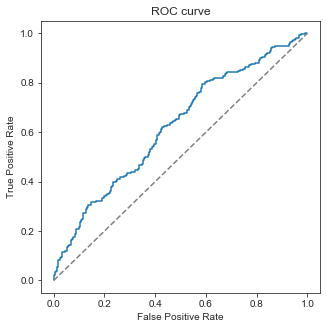

In [114]:
plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

## Формирование выходного файла

In [135]:
res_1 = test_a[['Id']].copy()
res_1['Credit Default'] = 1

In [136]:
res_0 = test_b[['Id']].copy()
res_0['Credit Default'] = 0

In [137]:
max_tr_f, max_tr_b_c

(0.25659804179984214, 0.38040254)

In [138]:
res_f = test_f[['Id']].copy()

lgbm_reg_model_f.fit(X_f, y_f)

pred_f = lgbm_reg_model_f.predict(T_f)

pred_f[pred_f >= max_tr_f] = 1
pred_f[pred_f < max_tr_f] = 0

res_f = pd.concat([res_f, pd.DataFrame(pred_f, columns=['Credit Default'], dtype=np.int32)], axis=1)
#res_f

In [139]:
res_c = test_c[['Id']].copy()

xgb_reg_model_c.fit(X_c, y_c)

pred_c = xgb_reg_model_c.predict(T_c)

pred_c[pred_c >= max_tr_b_c] = 1
pred_c[pred_c < max_tr_b_c] = 0

res_c = pd.concat([res_c, pd.DataFrame(pred_c, columns=['Credit Default'], dtype=np.int32)], axis=1)
#res_c

In [140]:
res = pd.concat([res_c, res_f], axis=0)
#res

In [141]:
res = pd.concat([res, res_1], axis=0)
res = pd.concat([res, res_0], axis=0)
#res

In [142]:
res.sort_values(by="Id", inplace=True)
res = res.reset_index(drop=True)
res

,Id,Credit Default
0,7500,1
1,7501,1
2,7502,1
3,7503,0
4,7504,0
...,...,...
2495,9995,0
2496,9996,1
2497,9997,1
2498,9998,0


In [143]:
res.to_csv("VGladyshev_predictions.csv", sep=",", index=False)